# Question 1. 



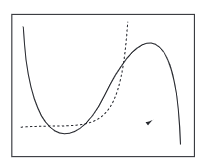


In [1]:
# importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.integrate import odeint

### Part 1. 
Set of equations approximating the figure above.

In [2]:
# Differential equations for the above system.

def dVdt(V, W, I_ext, a, b):
    return a*V - V**3/b - W + I_ext
    
def dWdt(V, W):
    return  np.exp(4*(V-1)) - W 


#Function approximating the cubic nullcline.

def V_nullcline(V, I_ext, a, b):
    return a*V - V**3/b + I_ext

#Function approximating the other nullcline.

def W_nullcline(V):
    return np.exp(4*(V-1))

Voltage = np.linspace(-5, 5, 100)
Gating_var = np.linspace(-5, 5, 100)

I_ext = 1 # Bifurcation parameter.



### Part 2.
A python script to plot the nullclines and the vector field. 

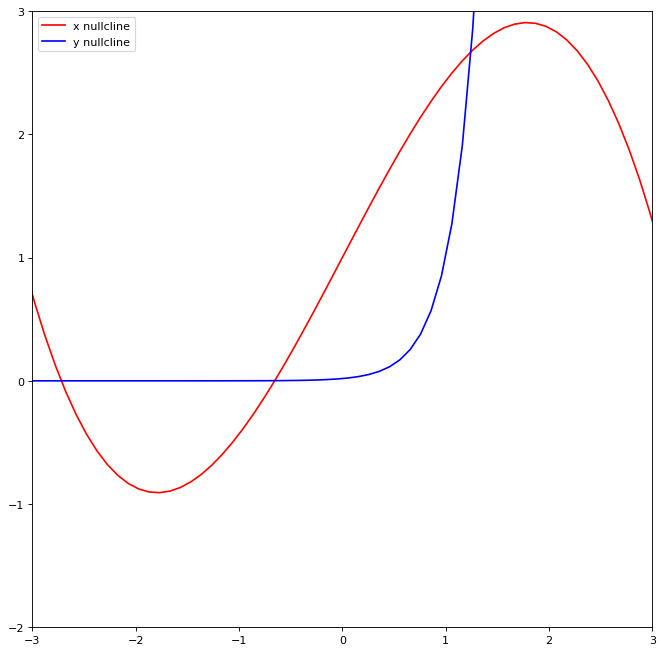

In [3]:
# Script for plotting the nullclines.
a = 1.6
b = 6
figure(figsize=(10,10), dpi=80)
plt.plot(Voltage, V_nullcline(Voltage, I_ext,a,b), label='x nullcline', color = 'red')
plt.plot(Gating_var, W_nullcline(Voltage), label='y nullcline', color = 'blue')
plt.xlim(-3,3)
plt.ylim(-2 ,3)
plt.legend()
plt.show()

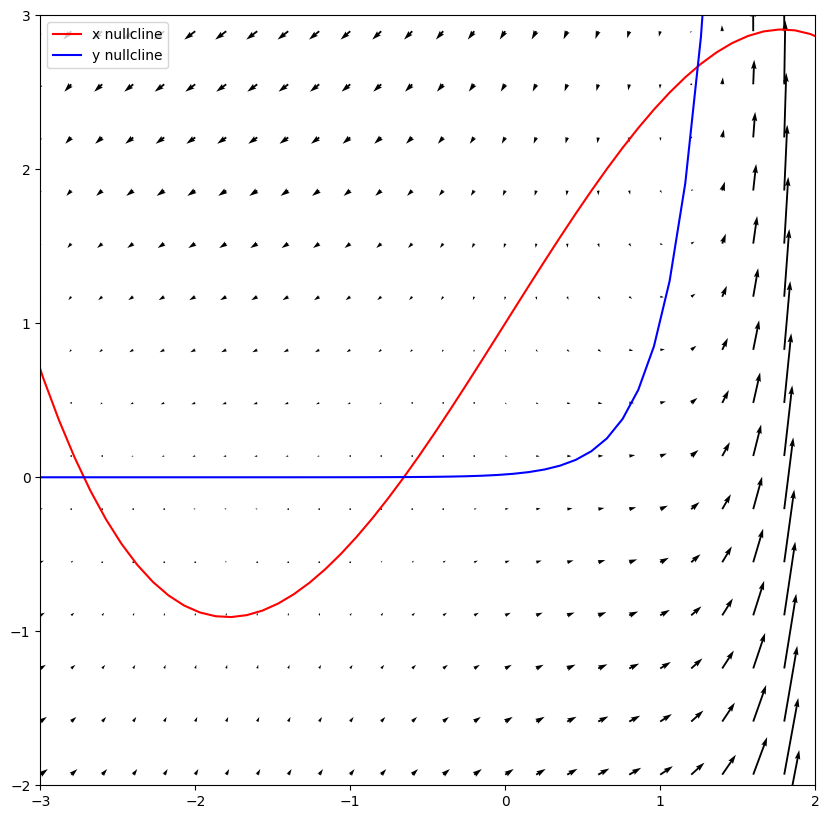

In [4]:
# Script for plotting the vector field.

#quiver plot over the nullclines for the vector field.

xd = np.linspace(-4, 1.8, 30)
yd = np.linspace(-4, 6, 30)

X, Y = np.meshgrid(xd, yd)
U = dVdt(X, Y, I_ext,a,b)
V = dWdt(X, Y)

figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)

plt.plot(Voltage, V_nullcline(Voltage, I_ext,a,b), label='x nullcline' , color = 'red')
plt.plot(Gating_var, W_nullcline(Gating_var), label='y nullcline' , color = 'blue')
plt.xlim(-3,2)
plt.ylim(-2 ,3)
plt.legend()
plt.show()



### Part 3.

Trajectories for different intitial conditions.

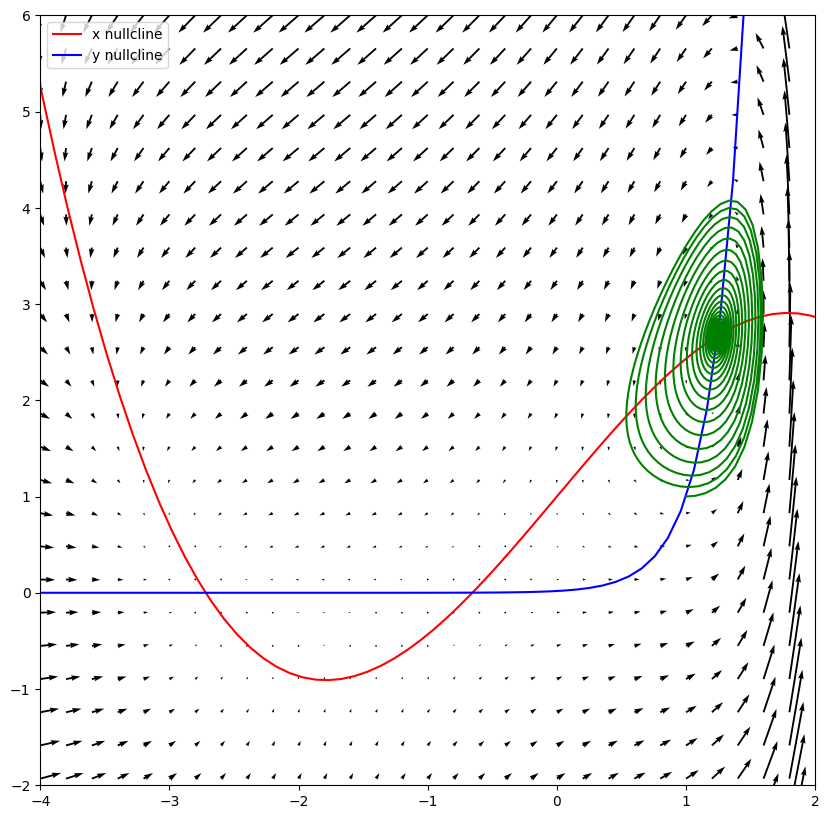

In [5]:

def dVoltagedt(X, t, I_ext):
    V, W = X
    return [dVdt(V,W, I_ext,a,b), dWdt(V, W)]

t = np.linspace(0, 100, 2000)

# Example trajectory #1. 
x_0 = 1
y_0 = 1

X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext,a,b), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-4,2)
plt.ylim(-2, 6)
plt.show()

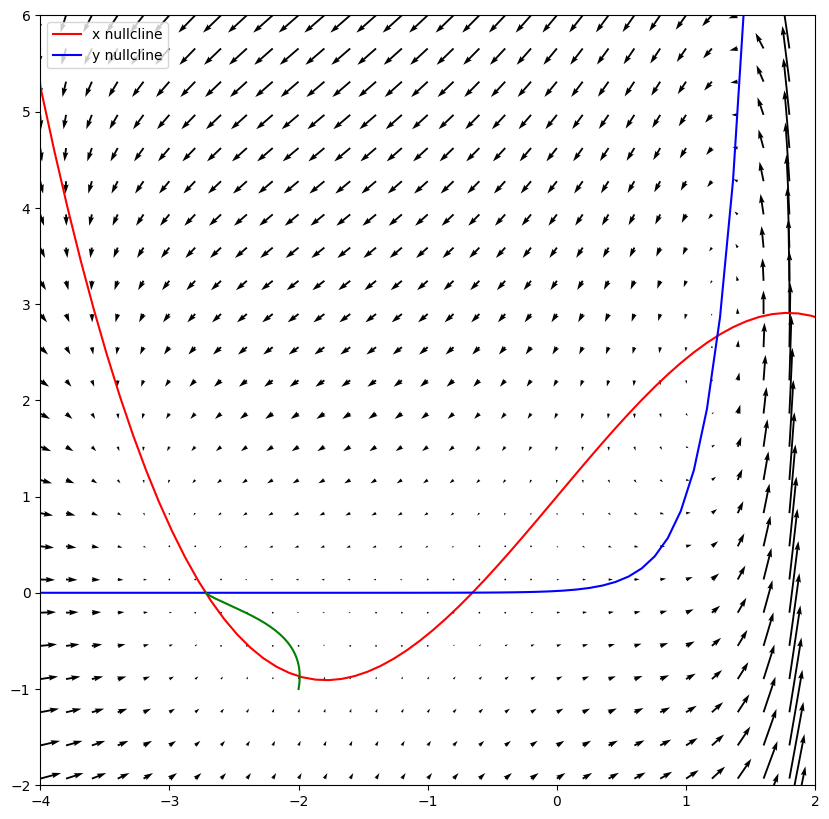

In [6]:
# Example trajectory #2. 
x_0 = -2
y_0 = -1

X0 = [x_0, y_0]


sol = odeint(dVoltagedt, X0, t, args=(I_ext,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext,a,b), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-4,2)
plt.ylim(-2, 6)
plt.show()

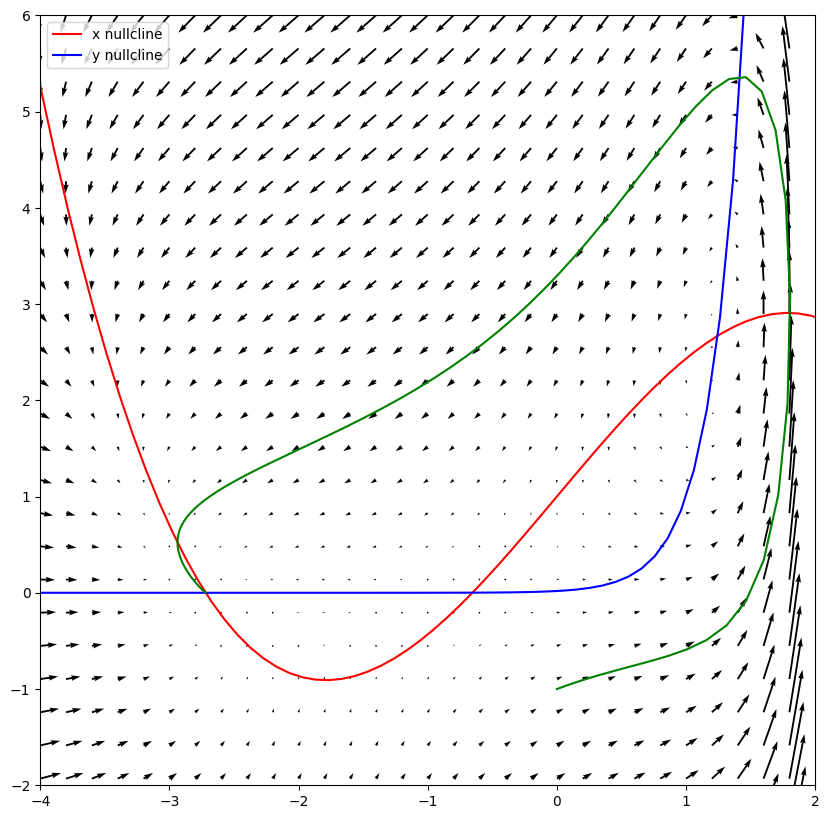

In [7]:
# Example trajectory #3. 
x_0 = 0
y_0 = -1

X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext,a,b), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-4,2)
plt.ylim(-2, 6)
plt.show()


### Part 4.

Voltage vs time plot. Frequency of spiking with the input current and the type of neuron.

50

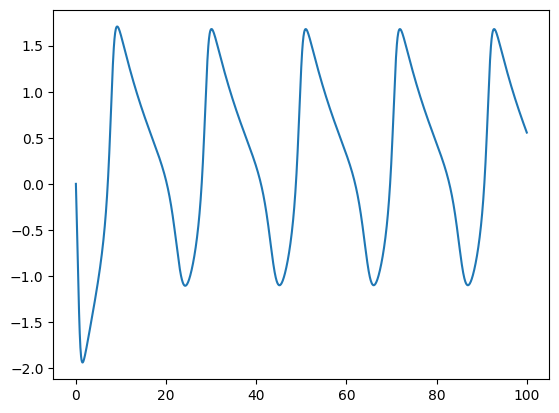

In [16]:
# Example trajectory #1. 
I_ext = 0.79  # Lower bound for excitable regime for given a, b, and tau.
I_ext = 1.21 # Upper bound for excitable regime for given a, b, and tau.
x_0 = 0
y_0 = 3
X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext,))
sol_x, sol_y = sol.T

plt.plot(t, sol_x, label='x')

# Frequency function of the system.

def spike_counter (t,sol_x,th) :
    ind1 = []
    for i in range(np.shape(sol_x)[0] -1) :
        
        if ((sol_x[i] - th) <= 0.0  and (sol_x[i+1] - th) > 0.0) :
            ind1.append(i)
    arr = t[ind1]
    Spikes = len(arr)   # In 100 ms.
    Spikes_per_second = Spikes*10
    return Spikes_per_second

Freq = spike_counter(t,sol_x,-0.5) # In 100 ms.
Freq

One can define any threshold above which a change in the voltage can be regarded as a spike. Here, for convenience, we define it to be -0.5.

For this value of the threshold, the excitable regime (the system does not settle back to a stable fixed point), lies in the region, $I_{ext} \in (0.79,1.21)$.

Inspecting the values of the current and the corresponding frequency, we see that the frequency first remains 0 till about $I_{ext} = 0.78$, beyond this it jumps to a value of 50 per second. This is the onset of the excitable regime.

This by itself, is sufficient to show that this model can not be used for a type I neuron, since for such a neuron there must be a continuous transition from 0 to a non-zero value for the frequency of spiking as the input current is increased. 

Now, we see that the frequency also further increases to 60 per second (although abruptly) as the value of input current is increased. However, as $I_{ext} <= 1.21$ $ and $I{ext} \approx 1.21$, the frequency drops back to 50. Furthermore, the frequency drops back to 0 once $I_{ext} > 1.21$.

This is sufficient to show that this model can not be used for a type II neuron as well, since for such a neuron the frequency of spiking keeps on increasing with increasing injected current. Thus, this neuron is neither type I nor Type II.

# Question 2. 
The FitzHugh-Nagumo model:

\begin{align*}
\frac{dv}{dt} &= v - \frac{v^3}{3} - w + I_{ext} \\
\tau \frac{dw}{dt} &= v + a - bw
\end{align*}

### Part 1. 
Parameter values in the excitable regime:

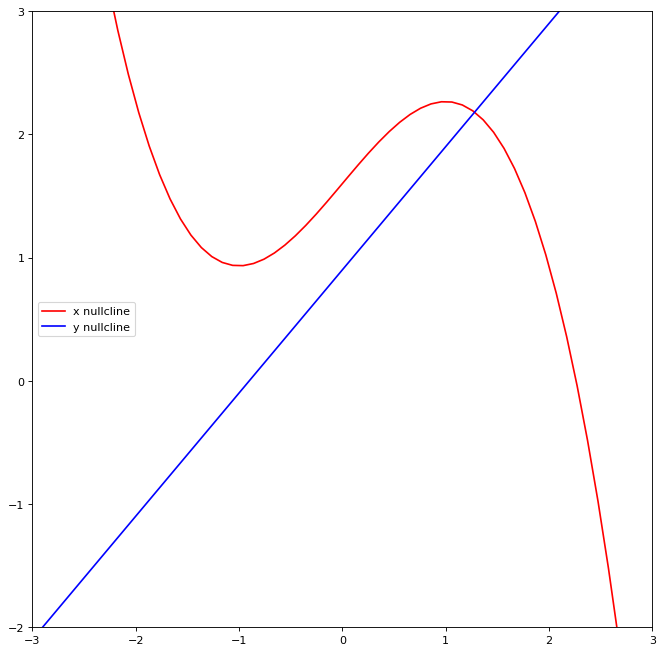

In [17]:
# Differential equations for the above system.

def dVdt(V, W, I_ext):
    return V - V**3/3 - W + I_ext
    
def dWdt(V, W, tau, a, b):
    return  (V + a - b*W)/tau


#Function approximating the cubic nullcline.

def V_nullcline(V, I_ext):
    return V - V**3/3 + I_ext

#Function approximating the other nullcline.

def W_nullcline(V,a,b):
    return (V + a)/b


Voltage = np.linspace(-5, 5, 100)
Gating_var = np.linspace(-5, 5, 100)

I_ext = 1.6 # Bifurcation parameter.

# Script for plotting the nullclines.
a = 0.9
b = 1
tau = 2
figure(figsize=(10,10), dpi=80)
plt.plot(Voltage, V_nullcline(Voltage, I_ext), label='x nullcline', color = 'red')
plt.plot(Gating_var, W_nullcline(Voltage, a,b), label='y nullcline', color = 'blue')
plt.xlim(-3,3)
plt.ylim(-2 ,3)
plt.legend()
plt.show()

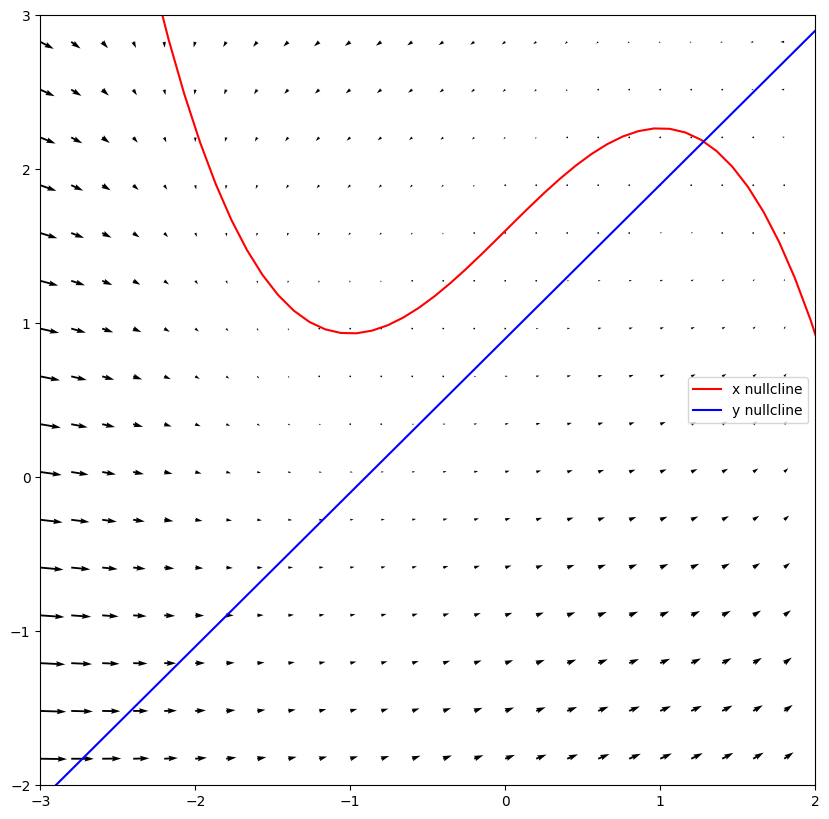

In [19]:
# Script for plotting the vector field.

#quiver plot over the nullclines for the vector field.

xd = np.linspace(-4, 1.8, 30)
yd = np.linspace(-4, 5, 30)

X, Y = np.meshgrid(xd, yd)
U = dVdt(X, Y, I_ext)
V = dWdt(X, Y,tau,a,b)

figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)

plt.plot(Voltage, V_nullcline(Voltage, I_ext), label='x nullcline' , color = 'red')
plt.plot(Gating_var,W_nullcline(Voltage, a,b), label='y nullcline' , color = 'blue')
plt.xlim(-3,2)
plt.ylim(-2 ,3)
plt.legend()
plt.show()



The excitable regime depends on all the parameters,viz. $\tau, a, b$ and $I_{ext}$. The parameter values for the excitable regime are:

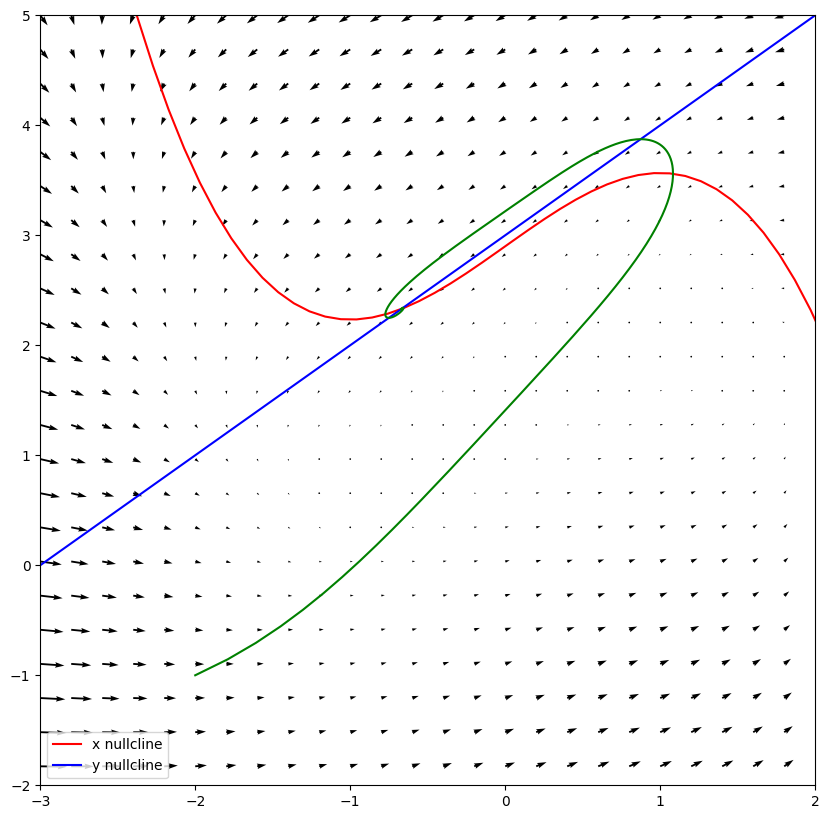

For tau<=1, there is no excitable regime for any a, b, and I_ext.


In [20]:
a = 3
b = 1
tau = 0.7
I_ext = 1.0 # Bifurcation parameter.
I_ext = 2.9  # Bifurcation parameter.

def dVoltagedt(X, t, I_ext):
    V, W = X
    return [dVdt(V,W, I_ext), dWdt(V, W,tau,a,b)]

t = np.linspace(0, 100, 2000)

# Example trajectory #1. 
x_0 =-2
y_0 = -1

X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage,a,b), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-3,2)
plt.ylim(-2, 5)
plt.show()

print("For tau<=1, there is no excitable regime for any a, b, and I_ext.")

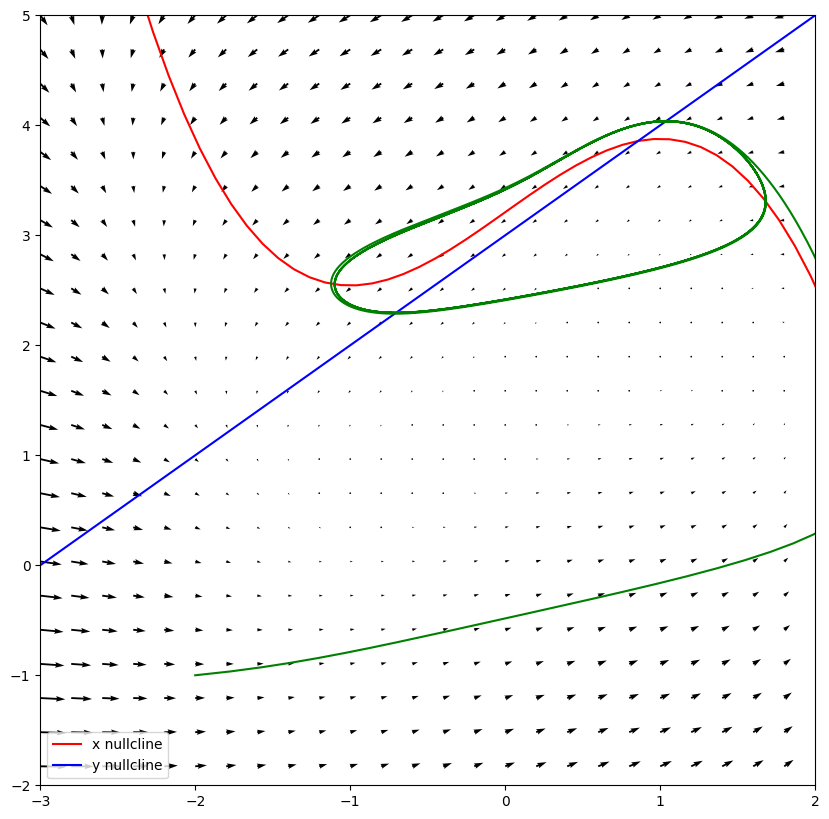

For tau=3, the excitable regime for any a = 3, b =1 lies between I_ext = 2.79 and I_ext = 3.21.


In [21]:
a = 3   # a > 1
b = 1
tau = 3 # tau > 1
I_ext = 2.79    # Lower bound for excitable regime for given a, b, and tau.
I_ext = 3.21  # Upper bound for excitable regime for given a, b, and tau.

def dVoltagedt(X, t, I_ext):
    V, W = X
    return [dVdt(V,W, I_ext), dWdt(V, W,tau,a,b)]

t = np.linspace(0, 100, 2000)

# Example trajectory #1. 
x_0 = -2
y_0 = -1

X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage,a,b), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-3,2)
plt.ylim(-2, 5)
plt.show()

print("For tau=3, the excitable regime for any a = 3, b =1 lies between I_ext = 2.79 and I_ext = 3.21.")

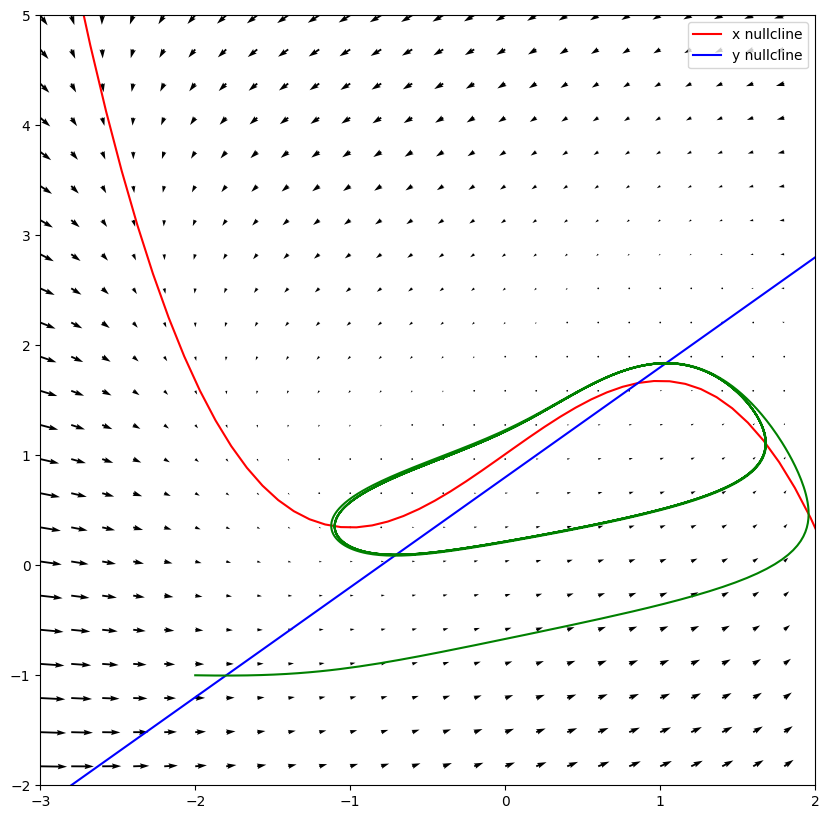

For tau=3, the excitable regime for any a = 0.8, b =1 the excitable regime lies between I_ext = 0.59 and I_ext = 1.01.

Thus, one can obtain the excitable regimes for different values of the parameters a, b, and tau, by varying the value of I_ext.


In [22]:
a = 0.8   # a < 1
b = 1
tau = 3 # tau > 1
I_ext = 0.59   # Lower bound for excitable regime for given a, b, and tau.
I_ext = 1.01  # Upper bound for excitable regime for given a, b, and tau.

def dVoltagedt(X, t, I_ext):
    V, W = X
    return [dVdt(V,W, I_ext), dWdt(V, W,tau,a,b)]

t = np.linspace(0, 100, 2000)

# Example trajectory #1. 
x_0 = -2
y_0 = -1

X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage,a,b), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-3,2)
plt.ylim(-2, 5)
plt.show()

print("For tau=3, the excitable regime for any a = 0.8, b =1 the excitable regime lies between I_ext = 0.59 and I_ext = 1.01.")
print()
print("Thus, one can obtain the excitable regimes for different values of the parameters a, b, and tau, by varying the value of I_ext.")

### Part 2. 
Explanation for post inhibitory rebound: the script below shows how post inhibitory spiking can be explanined by the FitzHugh-Nagumo model.

For the paramater values $a =1, b = 1, \tau = 3$ and $I_{ext} = 0.5$, the system is in the steady state (arbitrarily chosen). This can be shown by considering the initial condition $V = -2$ and $W = -1$ and then plotting the trajectory of the system over time. The nullclines and the vector field are plotted below.

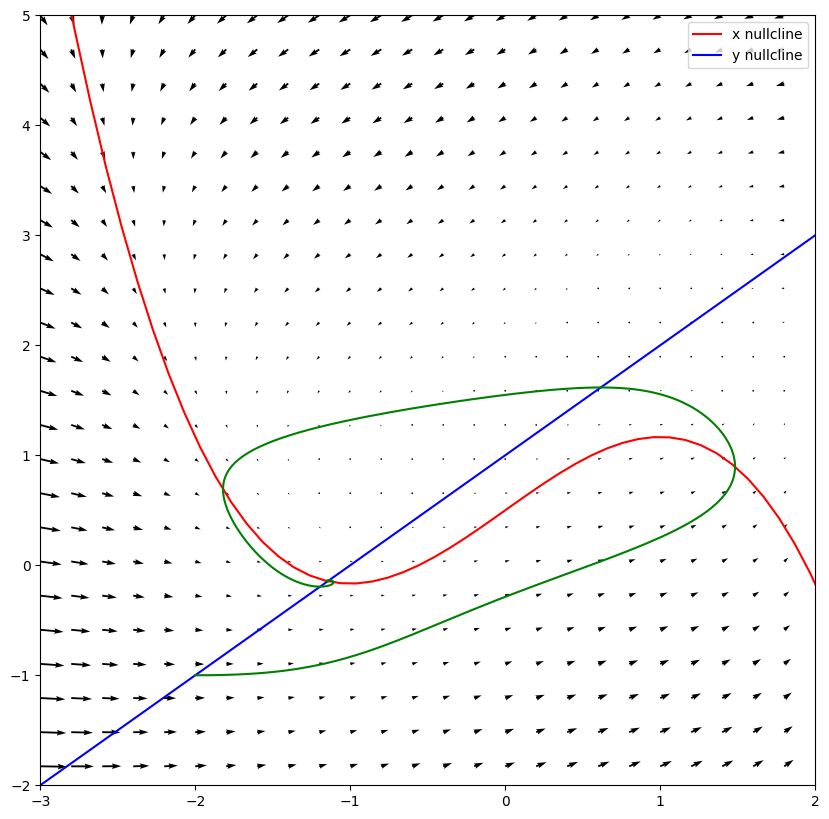

In [23]:
a = 1   
b = 1
tau = 3 
I_ext_steady  = 0.5  # This represents the steady state current, that is the current at which the system stays at steady state equilibrium.


def dVoltagedt(X, t, I_ext):
    V, W = X
    return [dVdt(V,W, I_ext), dWdt(V, W,tau,a,b)]

t = np.linspace(0, 100, 2000)

# Example trajectory #1. 
x_0 = -2
y_0 = -1

X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext_steady,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext_steady), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage,a,b), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-3,2)
plt.ylim(-2, 5)
plt.show()

Now, an inhibitory input corresponds to the value of $I_{ext}$ being lower than the above steady state value of $I_{ext}$. For convenience, we consider the value of $I_{ext}$, which corresponds to shifting the $V$ nullcline to almost precisely the point such that, $V = -2$ and $W = -1$.

This can be done by equating the $V$ nullcline and the $W$ nullcline equations and finding the value of $I_{ext}$ which satisfies the equality. This value is $I_{ext} \approx -1.67$.

Thus, plotted below are two $V$ nullclines, one for $I_{ext} = 0.5$ and the other for $I_{ext} = -1.67$. The latter shows the effect of an inhibitory current on the $V$ nullcline and the system which is taken to the point $V = -2$ and $W = -1$. As the $I_{ext}$ is brought back to 0.5, this earlier point becomes the initial condition for the new state of the system (perturbed) and thus the system returns to its original steady state, but by undergoing a spike. This explains the post inhibitory rebound.

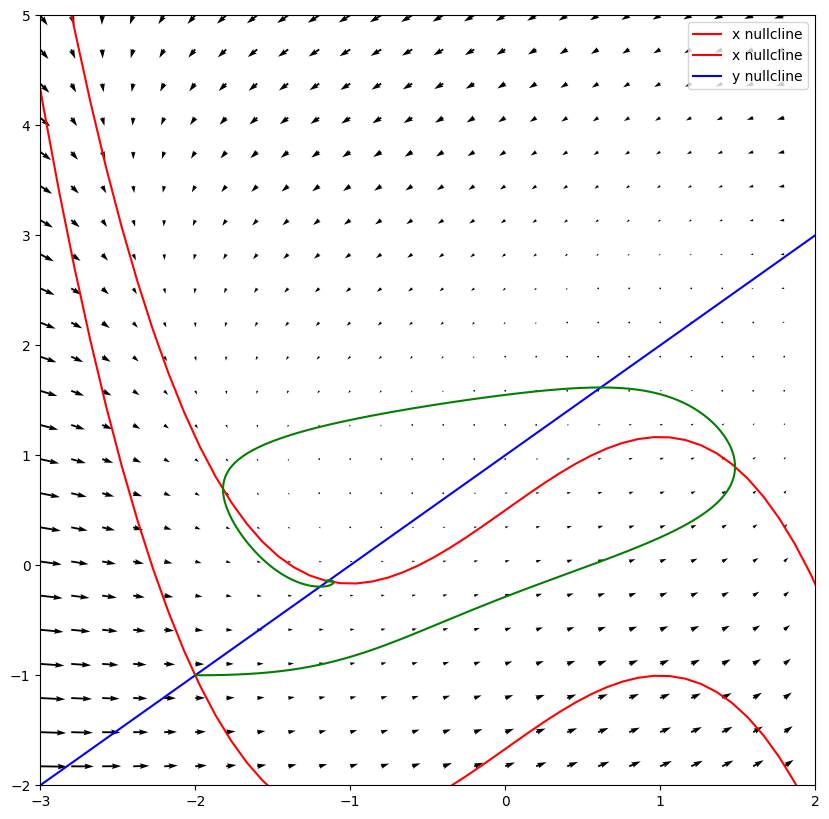

In [24]:
a = 1   
b = 1
tau = 3 
I_ext_pert = -1.67  # This represents the post inhibitory current.
I_ext_steady  = 0.5  # This represents the steady state current, that is the current at which the system stays at steady state equilibrium.


def dVoltagedt(X, t, I_ext):
    V, W = X
    return [dVdt(V,W, I_ext), dWdt(V, W,tau,a,b)]

t = np.linspace(0, 100, 2000)

# Example trajectory #1. 
x_0 = -2
y_0 = -1

X0 = [x_0, y_0]

sol = odeint(dVoltagedt, X0, t, args=(I_ext_steady,))
sol_x, sol_y = sol.T
figure(figsize=(10,10), dpi=100)
plt.quiver(X, Y, U, V)
plt.plot(Voltage, V_nullcline(Voltage, I_ext_steady), label='x nullcline' , color = 'red')
plt.plot(Voltage, V_nullcline(Voltage, I_ext_pert), label='x nullcline' , color = 'red')
plt.plot(Voltage, W_nullcline(Voltage,a,b), label='y nullcline' , color = 'blue')
plt.legend()
plt.plot(sol_x,sol_y ,  color = 'green')
plt.xlim(-3,2)
plt.ylim(-2, 5)
plt.show()